In [91]:
#회귀분석(LinearRegression)
#경사하강법(SGDRegressor)
#성능평가 지표(LinearRegression(ols), SGDRegressor)


#can.loc[:, can.isnull().any()]
#titanic = titanic.dropna()
#set(cancer['diagnosis'])#뭐있는지 확인

In [50]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("C:/Users/na040/Downloads/06. 선형 회귀_231026 (2) (2)/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
x = np.array(data["age"])
y = np.array(data["charges"])

x = x.reshape(1338,1)#벡터의 구조를 바꿈 원본 데이터 기준
y = y.reshape(1338,1)

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [15]:
print("intercept:", model.intercept_, "coef:", model.coef_)
######### 의료비 = 3.165.88 + 257.72*나이

intercept: [3165.88500606] coef: [[257.72261867]]


In [16]:
model.score(x,y) # 연령이 가지는 설명비율 약 9 % 나이머지가 약 91% 추정, 모델이 데이터를 잘 설명하지 못하고 있음.

0.08940589967885804

In [17]:
#새로운 데이터가 들어갔을때에 치료비의 예측법
x_new = [[19],[64]]# 19세 64세
y_hat = model.predict(x_new)
y_hat

array([[ 8062.61476073],
       [19660.13260074]])

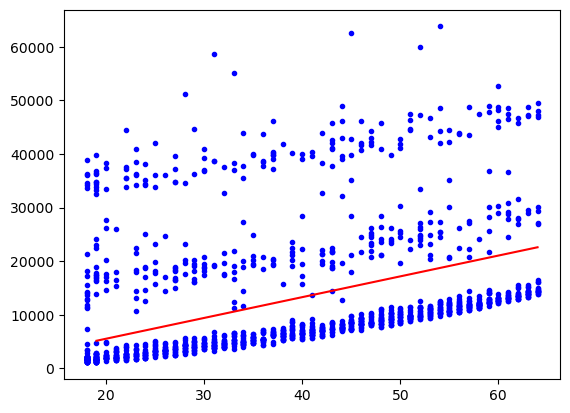

In [51]:
#x,y의 선형 작선 작도
plt.plot(x,y,"b.")
plt.plot(x_new,y_hat,"-r")
plt.show()

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
data =  pd.read_csv("/Users/na040/Downloads/06. 선형 회귀_231026 (2) (2)/boston.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<Axes: xlabel='RM', ylabel='PRICE'>

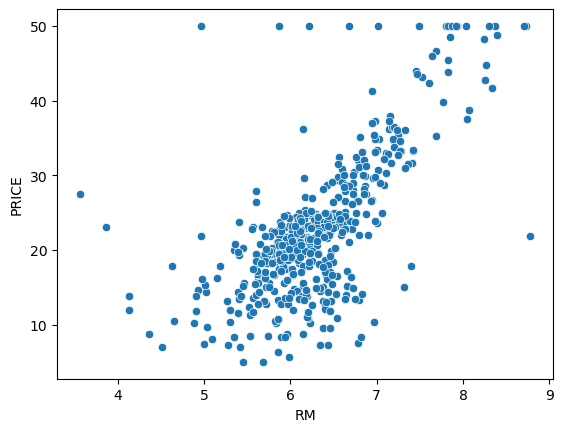

In [54]:
x = data["RM"]
y = data["PRICE"]

import seaborn as sns
sns.scatterplot(x = x, y= y)

In [56]:
import numpy as np

x = np.array(data["RM"])
y = np.array(data["PRICE"])

x = x.reshape(506,1)
y = y.reshape(506,1)

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [57]:
print("intercept :", model.intercept_, "coef:", model.coef_) #intercept: 절편, coef: 기울기


intercept : [-34.67062078] coef: [[9.10210898]]


In [58]:
model.score(x,y) #모델이 데이터를 어느정도 설명하고 있음

0.48352545599133423

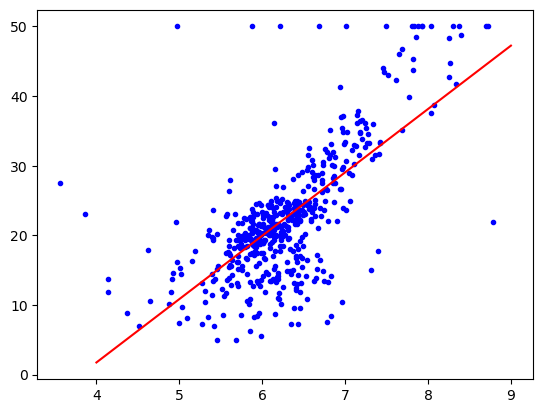

In [65]:
x_new = [[4],[9]]
y_hat = model.predict(x_new)
y_hat
plt.plot(x,y,"b.")
plt.plot(x_new,y_hat,"-r")
plt.show()

In [76]:
#경사 하강법
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDRegressor

data = pd.read_csv("/Users/na040/Downloads/06. 선형 회귀_231026 (2) (2)/insurance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [77]:
x = np.array(data["age"])
y = np.array(data["charges"])

x = x.reshape(1338,1) # reshape(row,1)
y = y.reshape(1338,1)

In [80]:
#이를 수정하기 위하여, 기준값을 잡아줌 random_state
model_SGD = SGDRegressor(max_iter = 1000, random_state = 2023)
model_SGD.fit(x,y)

C:\Users\na040\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(random_state=2023)

In [81]:
print("SGD 회귀 : ", "절편 : ", model_SGD.intercept_, "기울기 : ", model_SGD.coef_) #값이 계속 다름

SGD 회귀 :  절편 :  [-2189.33806509] 기울기 :  [387.38252888]


In [71]:
#임의의 19세와 64세에 대한 그래프
x_new = [[19],[64]]
y_hat = model_SGD.predict(x_new)
y_hat

array([ 83.85652982, 299.37874651])

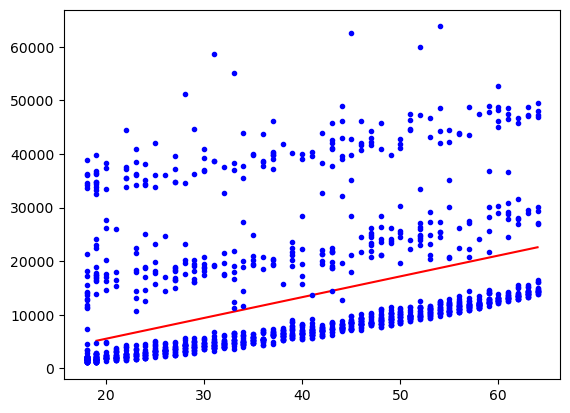

In [25]:
plt.plot(x_new,y_hat,'-r')
plt.plot(x,y,'b.')

In [26]:
###성능평가지표 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
salary = pd.read_csv("/Users/na040/Downloads/06. 선형 회귀_231026 (2) (2)/Salary_Data.csv")
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [30]:
#봉급자료의 결측치를 drop
salary = salary.dropna()
salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


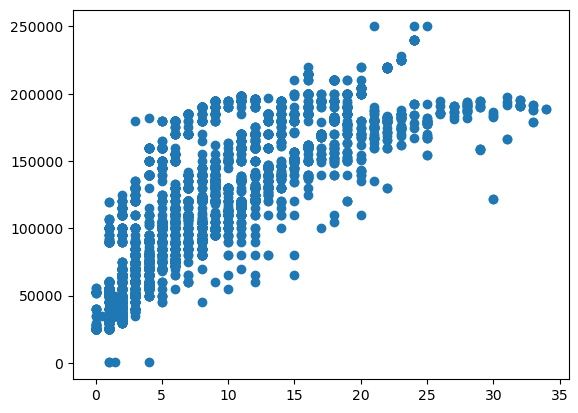

In [31]:
x = np.array(salary["Years of Experience"])
y = np.array(salary["Salary"])

x = x.reshape(len(salary),1)
y = y.reshape(len(salary),1)

plt.scatter(x= x,y =y)

In [32]:
#훈련자료와 테스트 자료로 분리

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 0)

In [33]:
#표준화
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()
x_scaler.fit(x_train)

x_train_scaled = x_scaler.fit_transform(x_train)
x_test_scaled = x_scaler.fit_transform(x_test)

model_ols = LinearRegression()
model_SGD = SGDRegressor()

model_ols.fit(x_train_scaled, y_train)
model_SGD.fit(x_train_scaled, y_train)

ols_pred = model_ols.predict(x_test_scaled)
SGD_pred = model_SGD.predict(x_test_scaled)

C:\Users\na040\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
#성능평가지표 호출
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ols_MAE = mean_absolute_error(ols_pred, y_test)
ols_MSE = mean_squared_error(ols_pred, y_test)
ols_r2 = r2_score(ols_pred, y_test)

SGD_MAE = mean_absolute_error(SGD_pred, y_test)
SGD_MSE = mean_squared_error(SGD_pred, y_test)
SGD_r2 = r2_score(SGD_pred, y_test)

print("MAE =", "ols_MAE : ", ols_MAE, "SGD_MSE : ", SGD_MAE)

MAE = ols_MAE :  25237.763780054273 SGD_MSE :  25277.948051008832


In [38]:
print("MSE =", "ols_MSE : ", ols_MSE, "SGD_MSE : ", SGD_MSE)

MSE = ols_MSE :  968559522.9906908 SGD_MSE :  967542764.4884205


In [39]:
print("r2 =", "ols_r2 : ", ols_r2, "SGD_r2 : ", SGD_r2)

r2 = ols_r2 :  0.5187651492024576 SGD_r2 :  0.5123301590321708


In [ ]:
# MAE는 최소값이 더 낮은 ols가
# MSE는 최소값이 더 낮은 SGD가
# r2는 0에 더 가까운 ols가 더 잘 설명하고 있기에
# ols 선택

In [43]:
model_ols = LinearRegression()
model_ols.fit(x,y)

LinearRegression()

In [44]:
print("ols 회귀 : ", "절편 : ", model_SGD.intercept_, "기울기 : ", model_SGD.coef_)

ols 회귀 :  절편 :  [58067.14987764] 기울기 :  [6126.86689857]


In [82]:
###성능평가지표 2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor

dt = pd.read_csv("/Users/na040/Downloads/06. 선형 회귀_231026 (2) (2)/boston.csv")
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


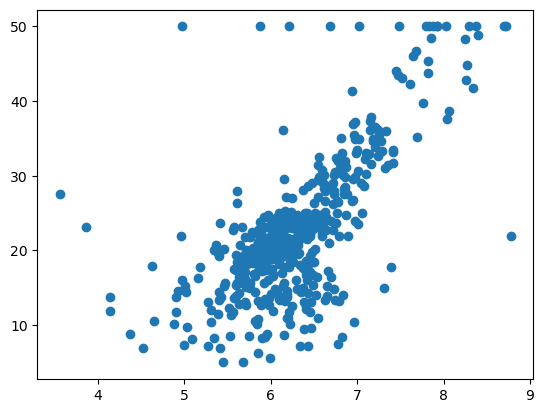

In [83]:
x = np.array(dt["RM"])
y = np.array(dt["PRICE"])

x = x.reshape(len(dt), 1)
y = y.reshape(len(dt), 1)

plt.scatter(x =x,y =y)

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.2, random_state= 0)

In [86]:
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()
x_scaler.fit(x_train)

x_train_scaled = x_scaler.fit_transform(x_train)
x_test_scaled = x_scaler.fit_transform(x_test)

model_ols.fit(x_train_scaled, y_train)
model_SGD.fit(x_train_scaled, y_train)

ols_pred = model_ols.predict(x_test_scaled)
SGD_pred = model_SGD.predict(x_test_scaled)

C:\Users\na040\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\na040\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ols_MAE = mean_absolute_error(ols_pred, y_test)
ols_MSE = mean_squared_error(ols_pred, y_test)
ols_r2 = r2_score(ols_pred, y_test)

SGD_MAE = mean_absolute_error(SGD_pred, y_test)
SGD_MSE = mean_squared_error(SGD_pred, y_test)
SGD_r2 = r2_score(SGD_pred, y_test)

print("MAE :", "ols_MAE : ", ols_MAE, "SGD_MSE : ", SGD_MAE)
print("MSE :", "ols_MSE : ", ols_MSE, "SGD_MSE : ", SGD_MSE)
print("r2 :", "ols_r2 : ", ols_r2, "SGD_r2 : ", SGD_r2)

MAE : ols_MAE :  5.418095116513698 SGD_MSE :  5.328779309282593
MSE : ols_MSE :  56.81587733388525 SGD_MSE :  54.484066905708666
r2 : ols_r2 :  -0.38169039187656684 SGD_r2 :  -0.7545640289443345


In [ ]:
#MAE 는 최소값이 더 낮은 SGD가
#MSE 또한 최소값이 더 낮은 SGD가
#r2는 0에 가까운 ols가
#SGD 선택

In [89]:
model_SGD = SGDRegressor(max_iter = 1000, random_state = 2023)
model_SGD.fit(x,y)

C:\Users\na040\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(random_state=2023)

In [90]:
print("SGD 회귀 : ", "절편 : ", model_SGD.intercept_, "기울기 : ", model_SGD.coef_)

SGD 회귀 :  절편 :  [-7.14173945] 기울기 :  [4.78938259]
